# Projeto 4

## Grupo:

### Matheus Pamplona
### Warlen Rodrigues



In [26]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
import math
from random import shuffle
import matplotlib.mlab as mlab

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\dell\Documents\GitHub\CD1S17\Projeto 4


#### Definição e Introdução do Problema

Estudaremos a variação percentual do consumo de energia per capita na Austrália e no Canadá. Como será que as pessoas se comportam nesses países que têm climas tão distintos.


Possível pergunta...

Será que os países frios gastam mais com aquecimento que os quentes com resfriamento? Ou seja, será que Canadá tem um teve uma variação no consumo de enernia maior que a Austrália?

#### Teste de Hipóteses

##### Em termos do Problema:

 $H0$ : O crescimento do consumo de energia per capita no Canadá (país frio) é maior que na Austrália (país quente)
 
 $H1$ : O crescimento do consumo de energia per capita no Canadá (país frio) não é maior que na Austrália (país quente)
 
 ##### Em termos estatísticos:
 
 Variável de interesse X = Crescimento do consumo de energia per capita
 
 $H0$ : $X$Canadá $>$ $X$Austrália
 
 $H1$ : $X$Canadá $\leq$ $X$Austrália


#### Como será construída a base de dados

Não haverá uma construção, mas sim a escolha de uma base de dados já existente, que por sua vez está presente no banco de dados Gapminder. Para realizar o estudo fora escolhido duas bases de dados que auxiliariam na análise: Gasto de energia por país; Gasto de energia per capta por país.



In [89]:
ett=pd.read_excel('ett.xlsx',sep=',')
epp=pd.read_excel('epp.xlsx',sep=',',sheetname='CA')

#### Comparação do Consumo de Energia Per Capita nos dois países.

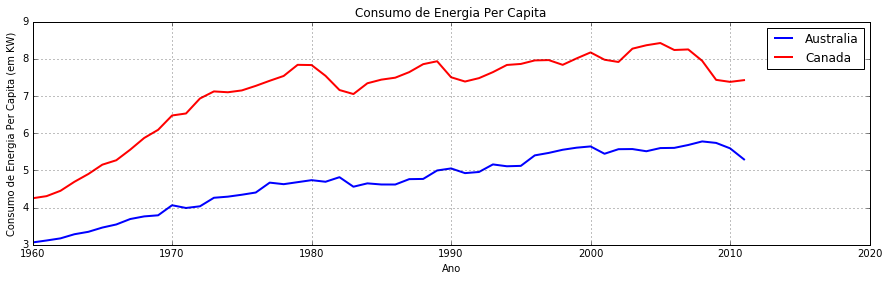

In [115]:
plt.figure(figsize=(15,4))
n = len(epp.Australia)
plt.plot(range(1960,(1960+n),1),epp.Australia, lw=2)
plt.plot(range(1960,(1960+n),1),epp.Canada,'red', lw=2)
plt.grid(True)
plt.legend(loc = 'best')
plt.title('Consumo de Energia Per Capita')
plt.xlabel('Ano')
plt.ylabel('Consumo de Energia Per Capita (em KW)')

Pelo gráfico do consumo de energia percapita podemos vizualizar que o consumo no Canadá sempre foi mais elevado que na Austrália. Para consguirmos comparar os dois países vamos trabalhar com a variação percentual ao longo dos anos.

#### Trabalhando com os dados percentuais e analisando para saber como será feito o Teste de Hipóteses

In [92]:
listaaust = []
listacan = []

for i in range (len(epp.Australia) -1):
    crescimento = (epp.Australia[i + 1] - epp.Australia[i])/epp.Australia[i]
    listaaust.append(crescimento)
    
for i in range (len(epp.Canada) -1):
    crescimento2 = (epp.Canada[i + 1] - epp.Canada[i])/epp.Canada[i]
    listacan.append(crescimento2)


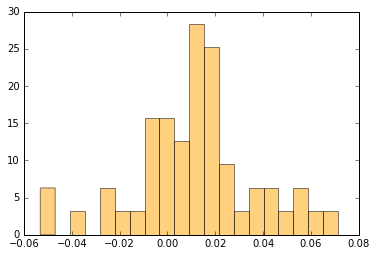

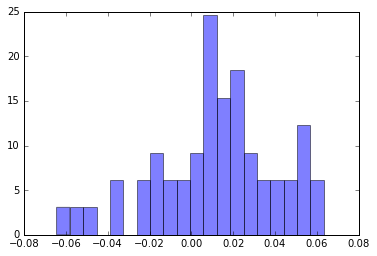

In [93]:
plt.hist(sorted(listaaust), bins = 20,alpha=0.5, color='orange', normed =1)
plt.show()
plt.hist(sorted(listacan), bins = 20,alpha=0.5, color='blue', normed =1)
plt.show()

Os histogramas mostram que a amostra que temos da variação percentual do consumo de energia per capita nos países não segue uma distribuição Normal, logo, teremos que aplicar o Bootstrap para fazermos o Teste de Hipóteses.

#### Bootstrap

Utilizando o Bootstrap nós forçamos que os dados dos dois países são parecidos e a partir daí podemos estudar a diferença entre as médias geradas pelos valores amostrais dos dois países embaralhados. Se a média do Histograma que será gerado for próxima ou igual a zero, podemos concluir que não rejeitamos $H0$.

In [137]:
listatot1 = []
listatot2 = []
listatot = listaaust + listacan 

In [119]:
P = 100000
perm = []

for i in range(0,P):
    shuffle(listatot)
    perm.append(mean(listatot[0:39]) - mean(listatot[40:]))


In [153]:
mu = np.mean(perm)
sigma = np.std(perm)
x = np.linspace(-0.03, 0.03, 10000)

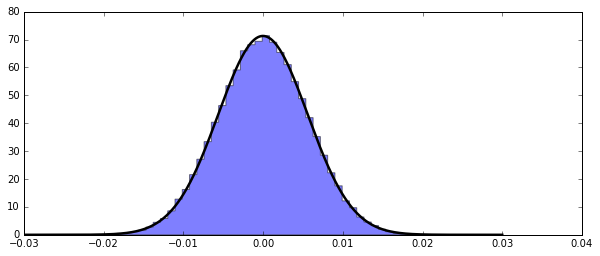

In [161]:
plt.figure(figsize=(10,4))
plt.hist(sorted(perm), bins = 50,alpha=0.5, color='blue', histtype='stepfilled',normed =1)
plt.plot(x,mlab.normpdf(x, mu, sigma), lw=2.5, color='black')
plt.show()

A média das diferenças geradas pelo Bootstrap é muito próxima de 0. Isso nos permite não rejeitar $H0$, o que implica dizer que temos muita confiança ao inferir que o crescimento do consumo de energia no Canadá não é que na Austrália. Os habitantes dos países mais frios gastam tanto quanto os habitantes dos países mais quentes em situações climáticas "extremas".